# Problem Statement
#### On April 15, 1912, the Titanic sank after hitting an iceberg, causing over 1502 deaths. Survival depended on factors like gender, age, and class.

**Objective:** Analyze Titanic passenger data and build a binary 
classification model to predict survival (`Survived`: 0 = No, 1 = Yes).

**Goals:**
- Explore how features (Age, Sex, Pclass, etc.) influenced survival.  
- Apply preprocessing for missing values & categorical data.  
- Train models (Logistic Regression, Random Forest, etc.).  
- Evaluate using Accuracy, Precision, Recall, F1-score, and ROC-AUC.  


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load & Explore Data (EDA)

In [2]:
# Load dataset (adjust path if needed)
train = pd.read_csv(r"D:\03 ml prac\train.csv")
test = pd.read_csv(r"D:\03 ml prac\test.csv")

# Preview data
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Type of columns
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Missing values count and percentage
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent (%)': missing_percent
}).sort_values(by='Percent (%)', ascending=False)

missing_df


,Missing Values,Percent (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [6]:
# Basic stats
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Survival counts
train['Survived'].value_counts(normalize=True) * 100


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

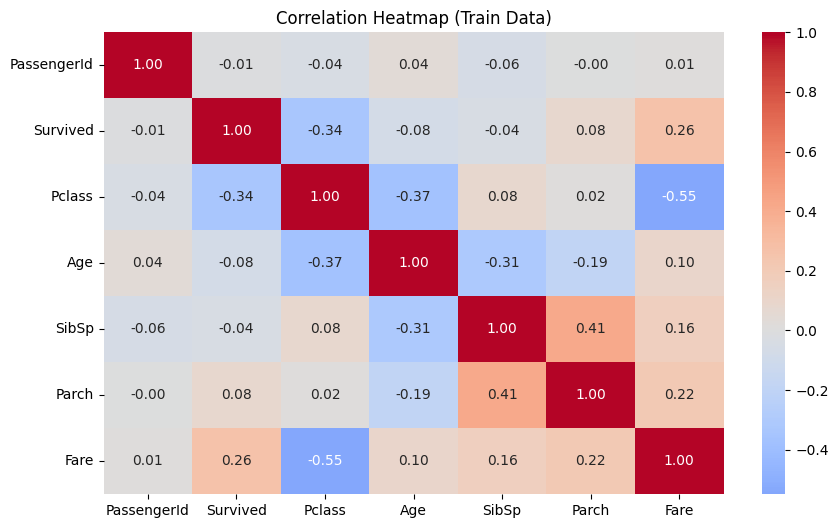

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=['int64','float64']).corr(), 
            annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap (Train Data)")
plt.show()


# Data Cleaning

In [9]:
train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
survival_by_embarked = train.groupby('Embarked')['Survived'].mean() * 100
print(survival_by_embarked)


Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [11]:
 # Fill Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
# Verify
train['Embarked'].isnull().sum()

np.int64(0)

In [12]:
# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)
# Verify
train['Age'].isnull().sum()
train['Age'].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering

In [15]:
# FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1


In [16]:
train.groupby(['FamilySize'])['Survived'].agg(["count","mean"])


,count,mean
FamilySize,,
1,537,0.303538
2,161,0.552795
3,102,0.578431
4,29,0.724138
5,15,0.200000
6,22,0.136364
7,12,0.333333
8,6,0.000000
11,7,0.000000


In [17]:
# FamilyType
train['FamilyType'] = pd.cut(train['FamilySize'], bins=[0,1,4,7,11], labels=['Single','Small','Medium','Large'])
test['FamilyType'] = pd.cut(test['FamilySize'], bins=[0,1,4,7,11], labels=['Single','Small','Medium','Large'])
train.groupby(['FamilyType'])['Survived'].agg(["count","mean"])

,count,mean
FamilyType,,
Single,537,0.303538
Small,292,0.578767
Medium,49,0.204082
Large,13,0.000000


In [18]:
# Age bins
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = [0,1,2,3,4]  # young to senior
train['AgeBin'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
test['AgeBin'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels)
# Convert AgeBin to int
train['AgeBin'] = train['AgeBin'].astype(int)
test['AgeBin'] = test['AgeBin'].astype(int)

train.groupby(['AgeBin'])['Survived'].agg(["count","mean"])

,count,mean
AgeBin,,
0,69,0.579710
1,70,0.428571
2,535,0.353271
3,195,0.400000
4,22,0.227273


In [19]:
def fare_bin(fare):
    if fare < 7.91:          # ~25th percentile
        return 0   # Low
    elif fare < 14.454:      # ~50th percentile
        return 1   # Medium
    elif fare < 31:           # ~75th percentile
        return 2   # High
    else:                     # Max and outliers
        return 3   # Very High

# Apply to train & test
train['FareBin'] = train['Fare'].apply(fare_bin)
test['FareBin']  = test['Fare'].apply(fare_bin)


In [20]:
# Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)    
train['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [21]:
# Combine rare titles
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess', 'Capt', 
               'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer' ] 


train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')


In [22]:
# Map to numbers
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

# Check counts
print(train['Title'].value_counts())

Title
0    517
1    182
2    125
3     40
4     27
Name: count, dtype: int64


In [23]:
train.groupby(['Title'])['Survived'].agg(["count","mean"])

,count,mean
Title,,
0,517,0.156673
1,182,0.697802
2,125,0.792000
3,40,0.575000
4,27,0.444444


In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FamilyType,AgeBin,FareBin,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Small,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Small,3,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Single,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Small,2,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Single,2,1,0


In [25]:
train.drop(['Name','SibSp','Parch','FamilySize','Age','Fare'], axis=1, inplace=True)
test.drop(['Name','SibSp','Parch','FamilySize','Age','Fare'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Embarked,FamilyType,AgeBin,FareBin,Title
0,0,3,male,S,Small,2,0,0
1,1,1,female,C,Small,3,3,2
2,1,3,female,S,Single,2,1,1
3,1,1,female,S,Small,2,3,2
4,0,3,male,S,Single,2,1,0


In [26]:
train.shape

(891, 8)

In [27]:
# Type of columns
print(train.dtypes)

Survived         int64
Pclass           int64
Sex             object
Embarked        object
FamilyType    category
AgeBin           int64
FareBin          int64
Title            int64
dtype: object


In [28]:
test.isnull().sum()

Pclass        0
Sex           0
Embarked      0
FamilyType    0
AgeBin        0
FareBin       0
Title         1
dtype: int64

In [29]:
test['Title'].fillna(train['Title'].mode()[0], inplace=True)


In [30]:
test.isnull().sum()

Pclass        0
Sex           0
Embarked      0
FamilyType    0
AgeBin        0
FareBin       0
Title         0
dtype: int64

In [31]:
# LabelEncoder for categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['Sex', 'Embarked', 'FamilyType']

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col]  = le.transform(test[col])  


In [32]:
train.head()



,Survived,Pclass,Sex,Embarked,FamilyType,AgeBin,FareBin,Title
0,0,3,1,2,3,2,0,0
1,1,1,0,0,3,3,3,2
2,1,3,0,2,2,2,1,1
3,1,1,0,2,3,2,3,2
4,0,3,1,2,2,2,1,0


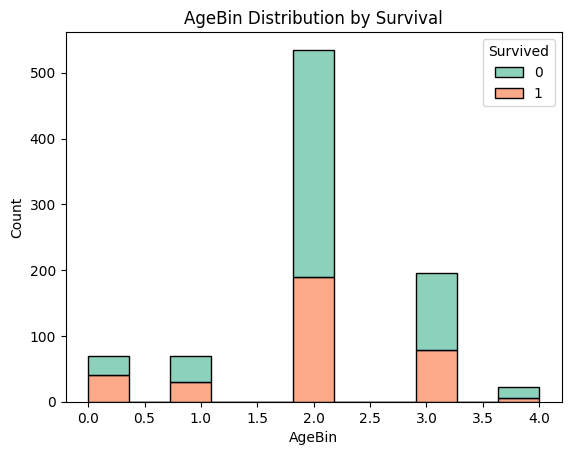

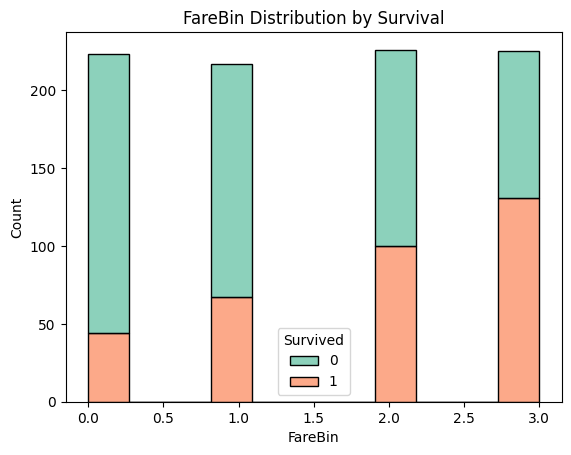

In [33]:
# Distribution plots for numeric bins
num_cols = ['AgeBin','FareBin']
for col in num_cols:
    sns.histplot(data=train, x=col, hue='Survived', multiple='stack', palette='Set2')
    plt.title(f'{col} Distribution by Survival')
    plt.show()


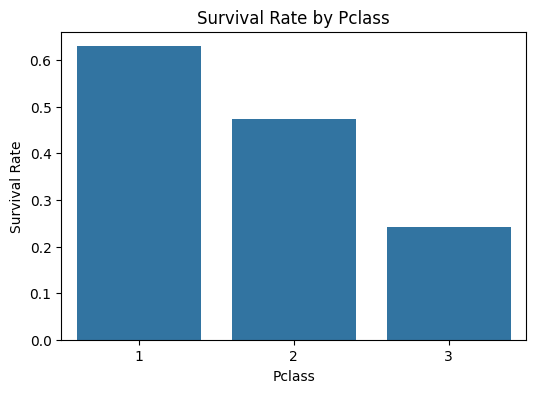

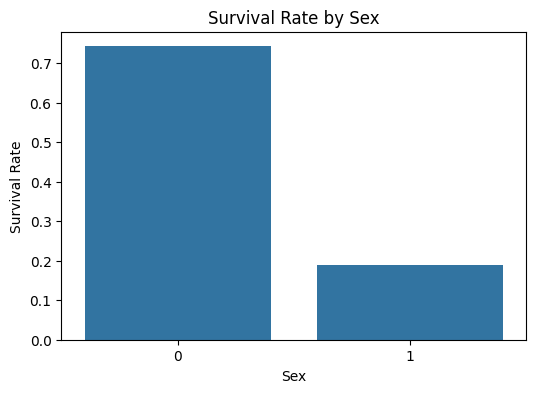

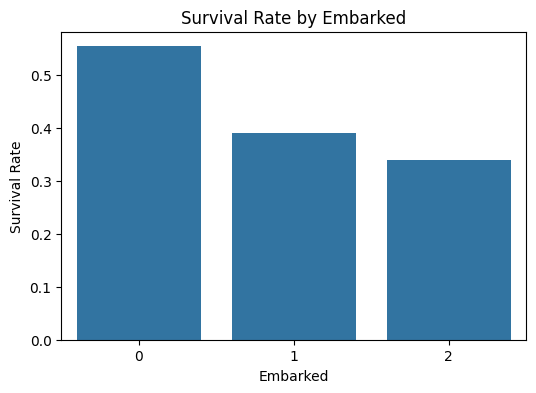

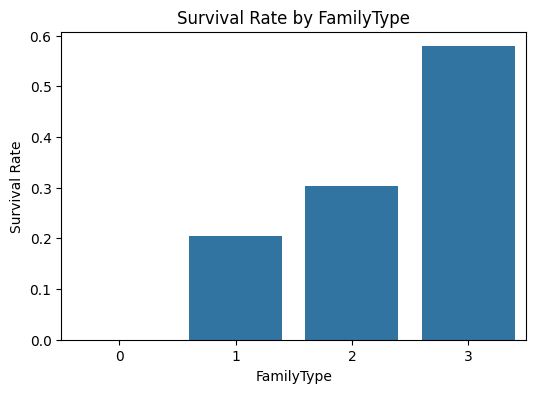

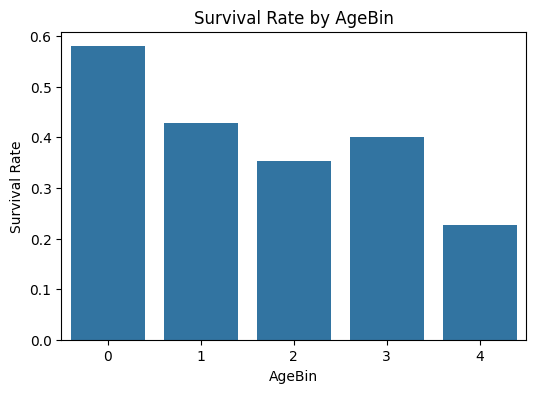

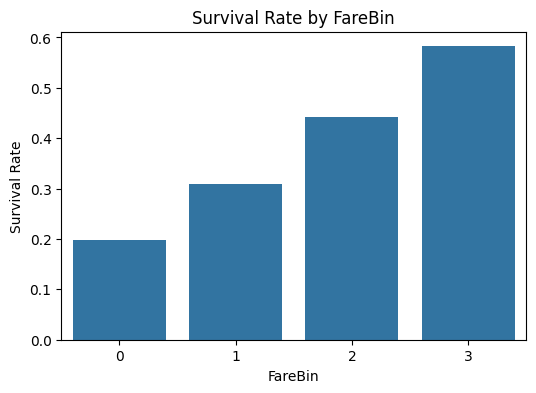

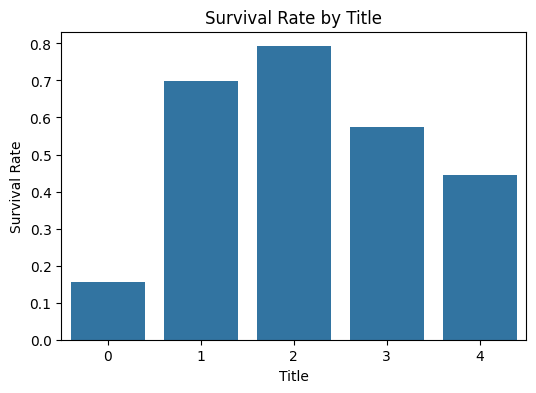

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['Pclass', 'Sex', 'Embarked', 'FamilyType', 'AgeBin', 'FareBin', 'Title']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Survived', data=train, ci=None)
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate')
    plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Features and target
X = train.drop('Survived', axis=1)
y = train['Survived']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y )
# keeps the same proportion of survived/not survived
# 20% of your data goes to test

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}



In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create an empty list to store metrics
results = []

# Train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append to results
    results.append([name, acc, prec, rec, f1])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
results_df = results_df.set_index('Model')

# Display nicely
print(results_df.round(3))



                        Accuracy  Precision  Recall     F1
Model                                                     
Logistic Regression        0.804      0.783   0.681  0.729
Decision Tree              0.782      0.742   0.667  0.702
Random Forest              0.816      0.765   0.754  0.759
Gradient Boosting          0.816      0.833   0.652  0.732
Support Vector Machine     0.816      0.781   0.725  0.752


# Insights:

### Ensemble models (Random Forest, Gradient Boosting) and SVM outperform simpler models.
### Random Forest provides the best balance between precision and recall, making it a reliable choice for survival prediction.
### Gradient Boosting is highly precise but less sensitive (lower recall), so it predicts survivors confidently but may miss some.

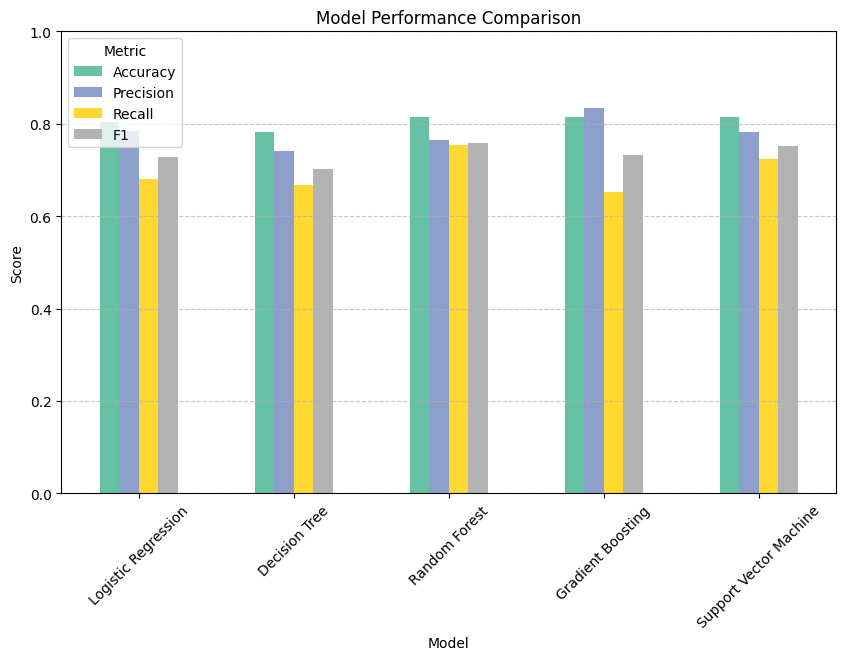

In [41]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
results_df.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)  # Scores between 0 and 1
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
